In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def Numerov(r0,t,R):
    h = t[1] - t[0] 

    psi = np.zeros_like(t)
    
    psi[0] = r0[0]
    psi[1] = r0[1]


    for i in range(2, len(t)):
        psi[i] = (2*(1+5*h**2/12*R[i-1])*psi[i-1]-(1-h**2/12*R[i-2])*psi[i-2])/(1-(h**2)/12*R[i])

    return psi

In [3]:
N = 1000
x = np.linspace(-5,5,N)
m = 1
w = 1

In [4]:
def Pote(x,E):
    return 2*(0.5*m*w**2*x**2-E)

In [5]:
r0 = [0,1*10**(-5)]

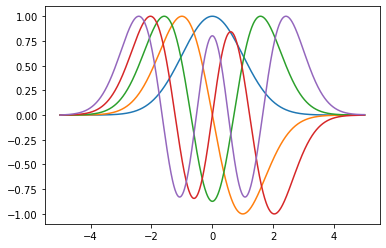

In [6]:
E = np.array([0.5,1.5,2.5,3.5,4.5,5.5])
C = np.zeros(5)
for i in range(5):
    V = Pote(x,E[i])
    sol = Numerov(r0,x,V)

    V_d = Pote(x,E[i] + 0.001)
    sol_V_d = Numerov(r0,x,V_d)
    C[i] = sol[-1]*sol_V_d[-1]
    plt.plot(x,sol/(np.max(sol)))

In [16]:
def Pote_n(x,E):
    return 2*(-10*np.e**(-x**2/20)-E)

Enf = np.linspace(-5.8,-9.6,3000)
E_sol = []
for i in range(3000):
    Va = Pote_n(x,Enf[i])
    sola = Numerov(r0,x,Va)

    V_da = Pote_n(x,Enf[i] + 0.001)
    sol_V_da = Numerov(r0,x,V_da)

    Ci = sola[-1]*sol_V_da[-1]
    if round(Ci,8)<0:
        E_sol.append(round(Enf[i],3))




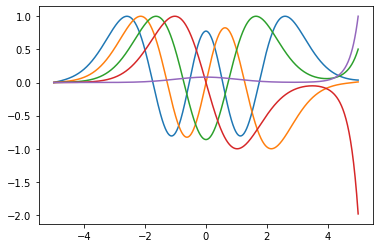

In [18]:
for i in range(5):
    V = Pote_n(x,E_sol[i])
    sol = Numerov(r0,x,V)

    plt.plot(x,sol/(np.max(sol)))

In [21]:
def Pote_b(x,E):
    return 2*(-4/(1+x**2)**2-E)

Enf = np.linspace(0,-3,3000)
E_sol2 = []
for i in range(3000):
    Va = Pote_b(x,Enf[i])
    sola = Numerov(r0,x,Va)

    V_da = Pote_b(x,Enf[i] + 0.001)
    sol_V_da = Numerov(r0,x,V_da)

    Ci = sola[-1]*sol_V_da[-1]
    if round(Ci,8)<0:
        E_sol2.append(round(Enf[i],3))
E_sol2


[-0.426, -2.472]

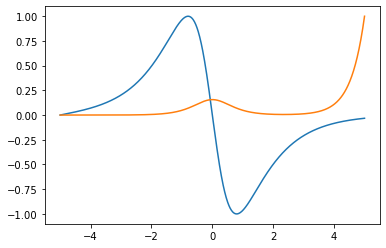

In [22]:
for i in range(2):
    V = Pote_b(x,E_sol2[i])
    sol = Numerov(r0,x,V)

    plt.plot(x,sol/(np.max(sol)))